In [1]:
import os
os.chdir("C:\\Users\\Lenovo\\Desktop\\New folder\\LetsUpgrade_Python_Aug")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("airline_passengers.csv")
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
dataset.set_index(['Month'])

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


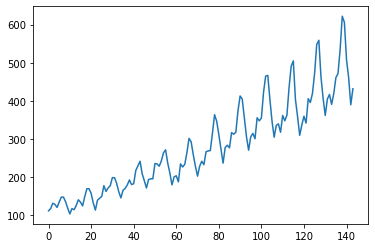

In [7]:
plt.plot(dataset['Thousands of Passengers'])

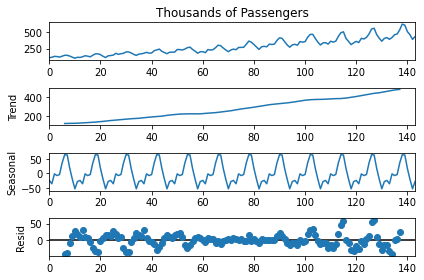

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'], period =12)
decomposition.plot()
plt.show()

In [9]:
# To check whether data is stationary or not - "Augmented Dickey Fuller Test"
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060569,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [11]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print('Augmented Dickey Fuller Test')
    labels = ['ADF Test Statistic Value','p-value', '#Lags' , 'No of Obs']
    
    for a, b in zip(result, labels):
        print(b + " : " + str(a))
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Weak evidence against null hypothesis and my timeseries is non-stationary")
        

In [12]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test
ADF Test Statistic Value : 0.8153688792060569
p-value : 0.9918802434376411
#Lags : 13
No of Obs : 130
Weak evidence against null hypothesis and my timeseries is non-stationary


In [13]:
dataset.head(1)

,Month,Thousands of Passengers
0,1949-01-01,112


In [14]:
dataset['1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [15]:
dataset.head(10)

,Month,Thousands of Passengers,1st Diff
0,1949-01-01,112,NaN
1,1949-02-01,118,6.0
2,1949-03-01,132,14.0
3,1949-04-01,129,-3.0
4,1949-05-01,121,-8.0
5,1949-06-01,135,14.0
6,1949-07-01,148,13.0
7,1949-08-01,148,0.0
8,1949-09-01,136,-12.0
9,1949-10-01,119,-17.0


In [17]:
adf_check(dataset['1st Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic Value : -2.8292668241699928
p-value : 0.05421329028382636
#Lags : 12
No of Obs : 130
Weak evidence against null hypothesis and my timeseries is non-stationary


In [18]:
dataset['2nd Diff'] = dataset['1st Diff']-dataset['1st Diff'].shift(1)

In [19]:
dataset.head(10)

,Month,Thousands of Passengers,1st Diff,2nd Diff
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,6.0,NaN
2,1949-03-01,132,14.0,8.0
3,1949-04-01,129,-3.0,-17.0
4,1949-05-01,121,-8.0,-5.0
5,1949-06-01,135,14.0,22.0
6,1949-07-01,148,13.0,-1.0
7,1949-08-01,148,0.0,-13.0
8,1949-09-01,136,-12.0,-12.0
9,1949-10-01,119,-17.0,-5.0


In [20]:
adf_check(dataset['2nd Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic Value : -16.384231542468505
p-value : 2.7328918500142407e-29
#Lags : 11
No of Obs : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [21]:
# Check seasonality part - stationary or not
dataset['Seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [23]:
dataset.head(20)

,Month,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
0,1949-01-01,112,NaN,NaN,NaN
1,1949-02-01,118,6.0,NaN,NaN
2,1949-03-01,132,14.0,8.0,NaN
3,1949-04-01,129,-3.0,-17.0,NaN
4,1949-05-01,121,-8.0,-5.0,NaN
5,1949-06-01,135,14.0,22.0,NaN
6,1949-07-01,148,13.0,-1.0,NaN
7,1949-08-01,148,0.0,-13.0,NaN
8,1949-09-01,136,-12.0,-12.0,NaN
9,1949-10-01,119,-17.0,-5.0,NaN


In [24]:
adf_check(dataset['Seasonality'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic Value : -3.383020726492481
p-value : 0.011551493085514952
#Lags : 1
No of Obs : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [ ]:
# Trend (p d q)
# d = 2
# p = ?
# q = ?

# Seasonality (P D Q)

# D = 1
# P = ?
# Q = ?

# I - Intigrated - difference (d / D)
# ARIMA = ?

In [25]:
# To find p/q and P/Q 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Trend (p - partial auto correlation and q - autocorrelation)

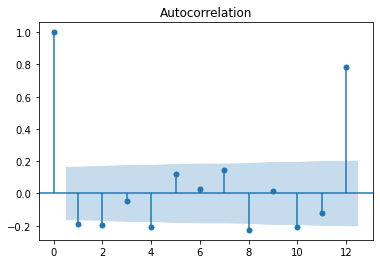

In [27]:
plot_acf(dataset['2nd Diff'].dropna(), lags=12)
plt.show()

In [ ]:
# correlation : -1 to +1
# -02 to -06 or +0.2 to +0.6 : weak correlation
# -0.6 to -1 or +0.6 to +1 : Strong corrlation
# -0.2 to +0.2 : Neautral - no correlation

In [ ]:
# Trend (p d q)
# d = 2
# p = ?
# q = 2

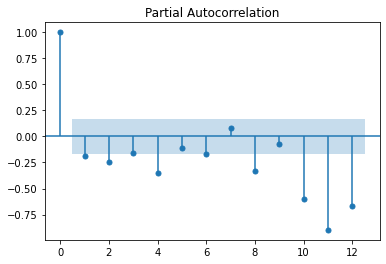

In [29]:
plot_pacf(dataset['2nd Diff'].dropna(), lags=12)
plt.show()

In [ ]:
# Trend (p d q)
# d = 2
# p = 2-4
# q = 2

In [ ]:
# Seasonality (P D Q)

# D = 1
# P = ?
# Q = ?

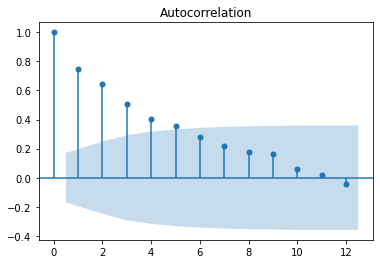

In [30]:
plot_acf(dataset['Seasonality'].dropna(), lags=12)
plt.show()

In [ ]:
# Seasonality (P D Q)

# D = 1
# P = 2
# Q = 5

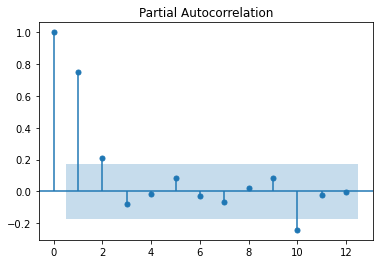

In [31]:
plot_pacf(dataset['Seasonality'].dropna(), lags=12)
plt.show()

In [ ]:
# Seasonality (P D Q)

# D = 1
# P = 2
# Q = 5

# Trend (p d q)
# d = 2
# p = 2-4
# q = 2

# Time Series Forecasting Model

In [33]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [34]:
# Seasonality (P D Q)
# D = 1
# P = 2
# Q = 5

# Trend (p d q)
# d = 2
# p = 2-4
# q = 2
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],order=(2,2,2), seasonal_order=(2,1,5,12))

In [ ]:
# seasonal_order=(2,1,5,12) : AIC : 1018.524
# seasonal_order=(2,1,4,12) : AIC : ?
# seasonal_order=(2,1,3,12) : AIC : ?
# seasonal_order=(2,1,2,12) : AIC : ?
# seasonal_order=(2,1,1,12) : AIC : ?

In [35]:
result = model.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
print(result.summary())

                                            SARIMAX Results                                             
Dep. Variable:                          Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -497.262
Date:                                          Tue, 14 Sep 2021   AIC                           1018.524
Time:                                                  21:36:36   BIC                           1052.934
Sample:                                                       0   HQIC                          1032.506
                                                          - 144                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar